In [ ]:
import sys

sys.path.insert(0,'..')

In [ ]:
# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause
import logging
from time import time

import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

from src.models import nmf as my_nmf

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (32, 32)
rng = RandomState(0)

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        #vmax = max(comp.nanmax(), -comp.min())
        plt.imshow(comp.reshape(image_shape))#, cmap=plt.cm.gray)
        plt.axis('off')
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Basic Shapse - Changing Location

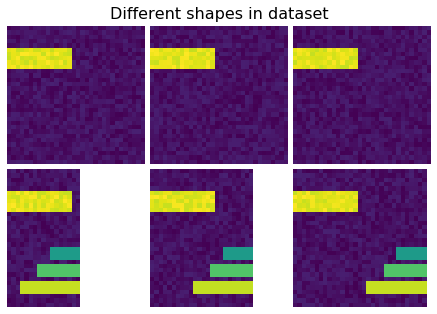

In [17]:
base = np.zeros((120,32,32))
base[:,5:10,0:15] = 1

base = base + np.random.rand(120,32,32) *0.1
positions = np.zeros(120)
for j in range(60):
    pos = int(j/4)
    positions[60+j]=pos
    base[60+j,18:21, 10+pos:18+pos] = 0.6
    base[60+j,22:25, 7+pos:18+pos] = 0.8
    base[60+j,26:29, 3+pos:18+pos] = 1
    base[60+j,:, 17+pos:] = np.nan

plot_gallery("Different shapes in dataset", base[[0,10,20,60,90,119]])

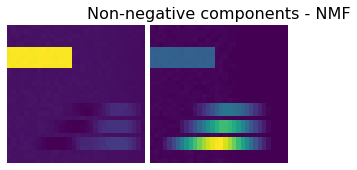

In [18]:
n_components = 2
data = np.nan_to_num(base.reshape(120, -1))
estimator = decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3)
estimator.fit(data)
components_ = estimator.components_

plot_gallery('Non-negative components - NMF', components_[:n_components])

# 1D NMF

(3840, 32) (3840, 4) (4, 32)


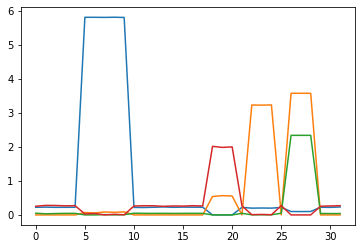

In [30]:
n_components = 4
rot_base = np.transpose(base, (0, 2, 1)).reshape(-1,32)
not_nan_index = ~np.isnan(rot_base).any(axis=1)
data = np.nan_to_num(rot_base)#data_nan[not_nan_index] # (n_samples=3360, n_features=32) (m=3360, n=32)

W, H, n_iter = my_nmf.non_negative_factorization(data, n_components=n_components, init='nndsvda', tol=5e-3)
print(np.shape(data), np.shape(W), np.shape(H)) 
# W (n_samples, n_components) -> (m=3360, r=2) not (n=32, r=2)
# H (n_components, n_features) -> (r=2, n=32) not (r=2, m=3360)
plt.plot(H.T)
plt.show()

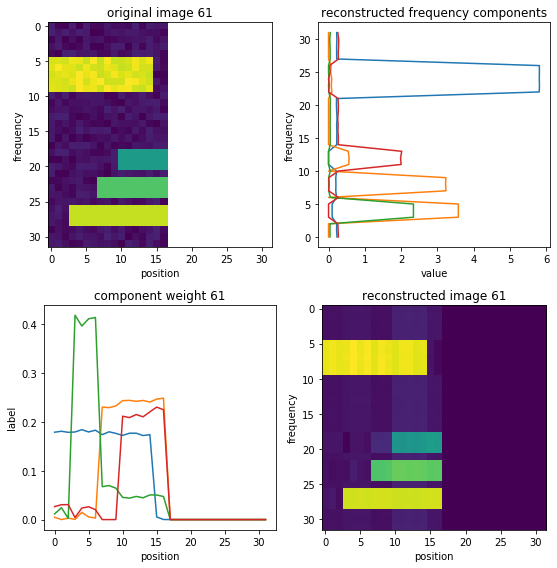

In [31]:
event_idex = 61

fig, ax = plt.subplots(2,2, figsize=(8,8) )
ax[0,0].imshow(base[event_idex])#, cmap=plt.cm.gray)
ax[0,0].set_ylabel('frequency')
ax[0,0].set_xlabel('position')
ax[0,0].set_title(f'original image {event_idex}')

#ax[0,1].plot(base[event_idex,:,0], label="position 0")
#ax[0,1].plot(base[event_idex,:,-2], label="position 30")
#ax[0,1].set_title('true frequency components')

ax[1,0].plot(W[event_idex*32:event_idex*32+32])#, cmap=plt.cm.gray)
ax[1,0].set_ylabel('label')
ax[1,0].set_xlabel('position')
ax[1,0].set_title(f'component weight {event_idex}')

ax[0,1].plot(H.T,np.arange(len(H.T))[::-1])#, cmap=plt.cm.gray)
ax[0,1].set_ylabel('frequency')
ax[0,1].set_xlabel('value')
ax[0,1].set_title('reconstructed frequency components')

ax[1,1].imshow((W[event_idex*32:event_idex*32+32] @ H).T)#, cmap=plt.cm.gray)
ax[1,1].set_ylabel('frequency')
ax[1,1].set_xlabel('position')
ax[1,1].set_title(f'reconstructed image {event_idex}')

plt.tight_layout()

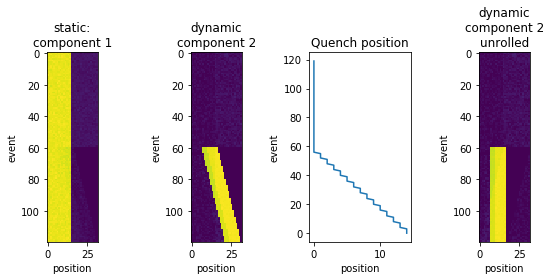

In [25]:
W_temp = W[:,1].reshape(-1,32)
W_roll = np.array([np.roll(W_temp[i], -int(positions[i])) for i in range(len(positions))])


fig,  ax= plt.subplots(1,4, figsize=(8,4) )
ax[0].imshow(W[:,0].reshape(-1,32))
ax[0].set_ylabel('event')
ax[0].set_xlabel('position')
ax[0].set_title('static:\ncomponent 1')

ax[1].imshow(W_temp)
ax[1].set_ylabel('event')
ax[1].set_xlabel('position')
ax[1].set_title('dynamic\ncomponent 2')

ax[2].plot(positions, np.arange(len(positions))[::-1])
ax[2].set_ylabel('event')
ax[2].set_xlabel('position')
ax[2].set_title('Quench position')

ax[3].imshow(W_roll)
ax[3].set_ylabel('event')
ax[3].set_xlabel('position')
ax[3].set_title('dynamic\ncomponent 2\nunrolled')

plt.tight_layout()

In [26]:
np.shape(W), np.shape(H)

((3840, 4), (4, 32))

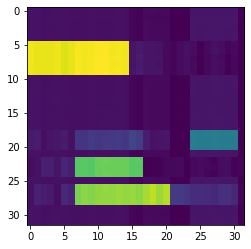

In [27]:
W_roll = W.copy()#[event_idex*32:event_idex*32+32]
W_roll[:,1] = np.array([np.roll(W_temp[i], -int(positions[i])) for i in range(len(positions))]).reshape(-1)

event_idex = 119
plt.imshow((W_roll[event_idex*32:event_idex*32+32] @ H).T)

In [ ]:
# center dynamic components (high correlation with position) around position

# Basic Shapes

In [ ]:
base = np.zeros((100,32,32))

base[:,10,10] = 1
base[:,11,9:12] = 1
base[:,12,8:13] = 1
base[:,13,7:14] = 1
base[:,14,8:13] = 1
base[:,15,9:12] = 1
base[:,16,10] = 1

base[10:50,20:30,20:30] = 0.5
base[40:50,5:11,24:30] = 0.7

for i in range(1,11):
    base[89+i,24:30,1:1+i*3] = 0.7

#base[:,25:30] = 0.7
    
#for i in range(100):
#    base[i,:,:int(i/10)] = np.nan
#    base[i,:,-10+int(i/10):] = np.nan

base = base + np.random.rand(100,32,32) *0.1

plot_gallery("Different shapes in dataset", base[[0,10,49,90,94,99]])

In [ ]:
n_components = 6
data = np.nan_to_num(base.reshape(100, -1))
estimator = decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3)
estimator.fit(data)
components_ = estimator.components_

plot_gallery('Non-negative components - NMF', components_[:n_components])

In [ ]:
n_components = 6
data = np.nan_to_num(base.reshape(100, -1))
estimator = decomposition.NMF(n_components=n_components, init='nndsvd', tol=5e-3)
estimator.fit(data)
components_ = estimator.components_

plot_gallery('Non-negative components - NMF', components_[:n_components])

In [ ]:


###############################################################################
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = base.reshape(100, -1)#dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces #- faces.mean(axis=0)

# local centering
#faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

###############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components, whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=2),
     True),
]


###############################################################################
# Plot a sample of the input data
plot_gallery("Different shapes in dataset", faces_centered[[0,10,49,90,94,99]])

###############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
        
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    if hasattr(estimator, 'noise_variance_'):
        print('')
        #plot_gallery("Pixelwise variance",
        #             estimator.noise_variance_.reshape(1, -1), n_col=1,
        #             n_row=1)
    plot_gallery('%s' % (name),
                 components_[:n_components])

plt.show()

# Faces dataset decompositions 

In [ ]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

###############################################################################
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


###############################################################################
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

###############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('Eigenfaces - RandomizedPCA',
     decomposition.PCA(n_components=n_components, whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=2),
     True),
]


###############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

###############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    if hasattr(estimator, 'noise_variance_'):
        print('')
        #plot_gallery("Pixelwise variance",
        #             estimator.noise_variance_.reshape(1, -1), n_col=1,
        #             n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()